In [2]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [15]:
def plot_spec(qobj,rlz=None,cn=2,bnum=10,lmin=40,lmax=2048):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Skk, Okk = local.load_spec(qobj,mb,rlz=rlz,cn=cn)
    Mkk = np.mean(Skk,axis=0)
    Vkk = np.std(Skk,axis=0)
    st0 = ana.PTEs(Okk,Skk,x1pte=True)
    st1 = ana.PTEs(Okk,Skk,x1pte=True,diag=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab=r'$10^2L^{0.5}C_L^{\varpi\varpi}$')
    #errorbar(mb.bc-5,(Okk-Mkk),yerr=Vkk,fmt='o')
    errorbar(mb.bc-5,mb.bc**0.5*(Okk-Mkk)*1e2,yerr=mb.bc**0.5*Vkk*1e2,fmt='o')
    errorbar(mb.bc+5,mb.bc**0.5*Mkk*1e2,yerr=mb.bc**0.5*Vkk*1e2,fmt='o')
    #plot(aobj.l,aobj.ckk,color='k',ls='--')
    plot(aobj.l,aobj.l**0.5*aobj.ckk*1e2,color='k',ls='--')
    figtext(.7,.80,r'$\chi$-PTE:'+str(np.round(st0.px1,2)))
    figtext(.7,.75,r'$\chi^2$-PTE:'+str(np.round(st0.px2,2)))
    figtext(.7,.70,r'$\chi^2$-PTE (diag):'+str(np.round(st1.px2,2)))
    axhline(0,color='k')
    show()

In [4]:
dirs = local.data_directory()
qobj = {}
#qids = ['comb_dn','comb_d','comb_n']
qids = ['comb_dn']
for qid in qids:
    aobj = local.init_analysis_params(qid=qid,ascale=3.,wtype='com16v3pt')
    qobj[qid] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

In [5]:
#w16 = tools_cmb.get_wfactors(qids,3.,wtype='com16v3pt')

wfactors: [1.98779519e-02 1.17519756e-06 8.70375332e-11 6.86867112e-15
 5.62093631e-19]


chi: -5.0 , chi (sim mean): 0.0 , chi (sim std): 5.7 , PTE: 0.38 
chi^2: 10.8 , chi^2 (sim): 11.2 , PTE: 0.42 
chi: -5.0 , chi (sim mean): 0.0 , chi (sim std): 5.7 , PTE: 0.38 
chi^2: 8.9 , chi^2 (sim): 11.2 , PTE: 0.58 


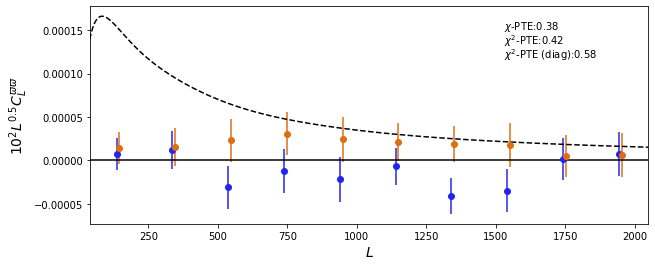

In [16]:
plot_spec(qobj['comb_dn'],bnum=10,lmin=40)

chi: 95.3 , chi (sim mean): 0.0 , chi (sim std): 5.6 , PTE: 0.00 
chi^2: 380.9 , chi^2 (sim): 11.1 , PTE: 0.00 
chi: 95.3 , chi (sim mean): 0.0 , chi (sim std): 5.6 , PTE: 0.00 
chi^2: 937.4 , chi^2 (sim): 11.1 , PTE: 0.00 


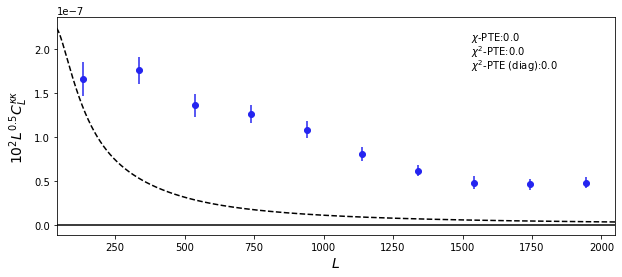

In [7]:
plot_spec(qobj['comb_d'],bnum=10,lmin=40)

In [ ]:
clm = 